In [6]:
%pylab inline
import pylab as plt

Populating the interactive namespace from numpy and matplotlib


/Users/casy/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'datetime', '__version__']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
import pandas as pd

In [8]:
import geopandas as gp
from datetime import datetime
import json
from code.iteration import iterate, iteration, update_data
from code.misc.logger import getLogger
# from code.misc.preparation import prepare
from code.main import data_preload, getSettings
from code.misc import *
import sys
__appname__ = "AVENTIKA_PRIORITY"
__author__ = "Phipipp Kats (casyfill)"
__version__ = "0.9.7.01 testing"

LIMIT = None  # manual execution bound

from code.misc.poi import getPOI, adjustScore

In [9]:
settings = getSettings()
start = datetime.now()  # start of the calculations
settings['limit'] = LIMIT
# settings['logger'] = getLogger()

In [18]:
poi, buff, reg = data_preload(settings)

In [11]:
p = adjustScore(getPOI(buff, poi, settings), settings)
p

2016-12-27 23:50:38,073 - root - INFO -    Pool:2 workers
2016-12-27 23:50:38,153 - root - INFO - [3, 3, 2, 2, 4]: koefficient 0.8 applied
2016-12-27 23:50:38,157 - root - INFO - [1]: koefficient 1.0 applied
2016-12-27 23:50:38,161 - root - INFO - []: koefficient 0.2 applied


,type,office_id,score,pid
0,foot,1,80.0,3
2,foot,3,80.0,3
1,foot,2,320.0,2
2,foot,3,320.0,2
2,foot,3,640.0,4
0,foot,1,1200.0,5
1,foot,2,1200.0,5
2,foot,3,1200.0,5
2,foot,3,800.0,1
3,stepless,1,1000.0,1


## Iteration 

In [ ]:
cntr = 1  # iteration counter

    # buffers of newly adopted offices will be added here iteratively
bound = settings['limit']
logger = settings['logger']
logger.info('Started iteration')


## Iteration

In [ ]:
cntr = 1  # iteration counter

In [ ]:
bid, score, reg_score, f_pois, s_pois = iteration(cntr, buff, poi,
                                                          reg, settings)


In [ ]:
buff, poi = update_data(buff, poi, bid, s_pois)
cntr += 1

In [ ]:
bid, score, reg_score, f_pois, s_pois = iteration(cntr, buff, poi,
                                                          reg, settings)


In [ ]:
buff, poi = update_data(buff, poi, bid, s_pois)
cntr += 1

In [ ]:
bid, score, reg_score, f_pois, s_pois = iteration(cntr, buff, poi,
                                                          reg, settings)


In [ ]:
bid

In [ ]:
buff

In [ ]:
bid = 2

In [ ]:
# buff, poi = update_data(buff, poi, bid, s_pois)
# cntr += 1

In [ ]:
slct = buff.loc[idx[:, bid], :]  # selected Office
slct

In [ ]:
buff = buff[buff.index.get_level_values(1) != bid]

In [ ]:
buff

In [ ]:
buff.empty

In [ ]:
getReg_overlayed(buff, reg, settings)

## Iterate

In [12]:

bid, score, r_score, foot_pois, stepless_pois, stepless_regs = iteration(1, buff, poi, reg, settings)

2016-12-27 23:50:41,032 - root - INFO - [3, 3, 2, 2, 4]: koefficient 0.8 applied
2016-12-27 23:50:41,041 - root - INFO - [1]: koefficient 1.0 applied
2016-12-27 23:50:41,048 - root - INFO - []: koefficient 0.2 applied
2016-12-27 23:50:41,124 - root - INFO - [1.0, 1.0, 1.0, 1.0, 1.0]: koefficient 0.8 applied
2016-12-27 23:50:41,129 - root - INFO - [1.0, 1.0, 2.0, 2.0, 1.0]: koefficient 1.0 applied
2016-12-27 23:50:41,133 - root - INFO - []: koefficient 0.2 applied
2016-12-27 23:50:41,175 - root - INFO - Priority 1: bank office 3, score: 4235.0


In [13]:
bid

3

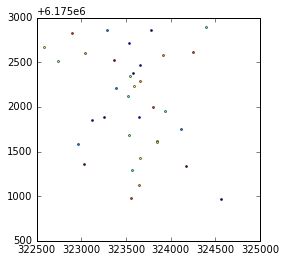

In [14]:
reg.plot()

In [30]:
buff, poi, reg = update_data(buff, poi, reg, bid, stepless_pois, stepless_regs)

In [31]:
poi.shape

(4, 4)

In [32]:
reg.shape

(35, 4)

In [33]:
bid, score, r_score, foot_pois, stepless_pois, stepless_regs = iteration(1, buff, poi, reg, settings)

TypeError: 'NoneType' object has no attribute '__getitem__'